In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import utils

In [ ]:
def convolve_im_spatial(im: np.array,
                kernel: np.array,
                verbose=True):
    """ Convolves the image (im) with the spatial kernel (kernel),
        and returns the resulting image.

        "verbose" can be used for turning on/off visualization
        convolution
        
        Note: kernel can be of different shape than im.

    Args:
        im: np.array of shape [H, W]
        kernel: np.array of shape [K, K] 
        verbose: bool
    Returns:
        im: np.array of shape [H, W]
    """
    
    H, W = im.shape
    Kh, Kw = kernel.shape

    k_flipped = np.flipud(np.fliplr(kernel))

    pad_h = Kh // 2
    pad_w = Kw // 2

    im_padded = np.pad(im,
                       ((pad_h, pad_h),
                        (pad_w, pad_w)),
                       mode='constant',
                       constant_values=0)

    out = np.zeros_like(im, dtype=np.float64)

    for y in range(H):
        for x in range(W):
            region = im_padded[y:y+Kh, x:x+Kw]
            out[y, x] = np.sum(region * k_flipped)

    if verbose:
        plt.figure(figsize=(12,4))

        plt.subplot(1,3,1)
        plt.imshow(im, cmap='gray')
        plt.title("Input image")
        plt.axis('off')

        plt.subplot(1,3,2)
        plt.imshow(kernel, cmap='gray')
        plt.title("Kernel")
        plt.axis('off')

        plt.subplot(1,3,3)
        plt.imshow(out, cmap='gray')
        plt.title("Convolved result")
        plt.axis('off')

    return out

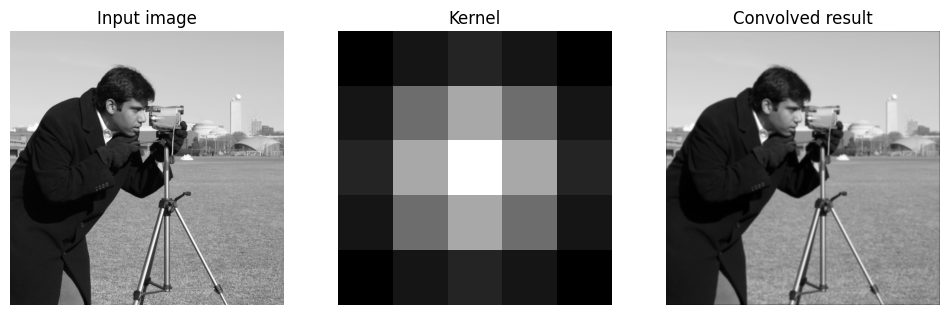

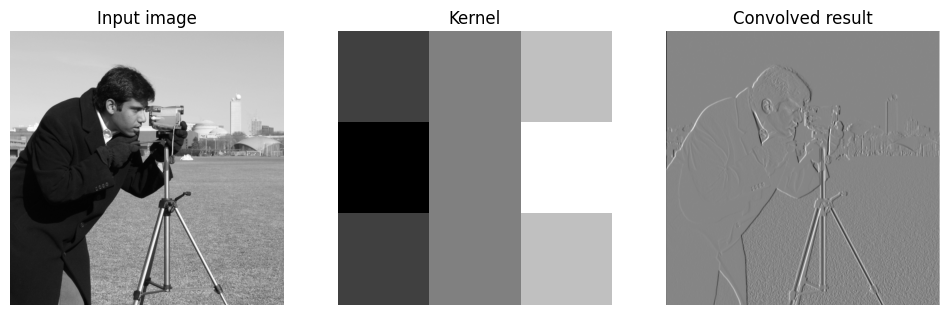

Saving image to: image_processed/camera_gaussian.png
Saving image to: image_processed/camera_sobelx.png


/home/vegardhoug/NTNU/5H25/TDT4195_Visual_computing_fundementals/visual-computing-ip/Assignment 2/utils.py:27: UserWarning: Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)
  warnings.warn("Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)")


In [3]:
if __name__ == "__main__":
    verbose = True  # change if you want

    # Changing this code should not be needed
    im = skimage.data.camera()
    im = utils.uint8_to_float(im)

    # DO NOT CHANGE
    gaussian_kernel = np.array([
        [1, 4, 6, 4, 1],
        [4, 16, 24, 16, 4],
        [6, 24, 36, 24, 6],
        [4, 16, 24, 16, 4],
        [1, 4, 6, 4, 1],
    ]) / 256
    image_gaussian = convolve_im_spatial(im, gaussian_kernel, verbose)

    # DO NOT CHANGE
    sobel_horizontal = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])
    image_sobelx = convolve_im_spatial(im, sobel_horizontal, verbose)

    if verbose:
        plt.show()

    utils.save_im("camera_gaussian.png", image_gaussian)
    utils.save_im("camera_sobelx.png", image_sobelx)